<a href="https://colab.research.google.com/github/NiyazovIlia/neural_networks/blob/lesson_2/neural_networks_lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Код нейронной сети в Keras!
###############################
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics

In [ ]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

# приведем изображение к диапазону (-1,1).
train_images = (train_imagef / 127) - 1
test_images = (test_imagef / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

4431872/4422102 [==============================] - 0s 0us/step


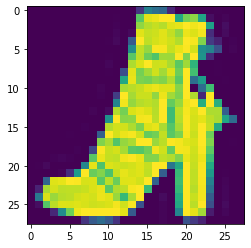

In [ ]:
plt.imshow(train_imagef[11,:,:])
plt.show()

In [ ]:
# Build the model.
array = [110, 100, 90]
array1 = [100, 90, 80]
test = {}

for i in range(len(array)):
  for j in range(len(array1)):
    model = Sequential([
      Dense(128, activation='tanh', input_shape=(784,)),
      Dense(array[i], activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
      Dense(array1[j], activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
    hh = model.fit( 
      train_images,
      to_categorical(train_labelf),
      epochs=10,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labelf)
    )

    test[f'{array[i]} и {array1[j]}'] = hh.history['accuracy'][9]

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5073 - accuracy: 0.8170 - val_loss: 0.4493 - val_accuracy: 0.8351
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4022 - accuracy: 0.8546 - val_loss: 0.4321 - val_accuracy: 0.8428
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3691 - accuracy: 0.8646 - val_loss: 0.3908 - val_accuracy: 0.8642
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3559 - accuracy: 0.8693 - val_loss: 0.3597 - val_accuracy: 0.8670
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3383 - accuracy: 0.8750 - val_loss: 0.3793 - val_accuracy: 0.8624
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3320 - accuracy: 0.8766 - val_loss: 0.3576 - val_accuracy: 0.8663
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3204 - accuracy: 0.8817 - val_loss: 0.3722 - val_accuracy

In [ ]:
test

{'100 и 100': 0.8912083506584167,
 '100 и 80': 0.8875625133514404,
 '100 и 90': 0.8880416750907898,
 '110 и 100': 0.8896874785423279,
 '110 и 80': 0.8903541564941406,
 '110 и 90': 0.8908125162124634,
 '90 и 100': 0.8883125185966492,
 '90 и 80': 0.8897708058357239,
 '90 и 90': 0.8889999985694885}

**2 слоя**

In [ ]:
model = Sequential([
      Dense(128, activation='tanh', input_shape=(784,)),
      Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
      Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    # Compile the model.
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh = model.fit( 
      train_images,
      to_categorical(train_labelf),
      epochs=10,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
model.evaluate(
      test_images,
      to_categorical(test_labelf)
    )

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5047 - accuracy: 0.8176 - val_loss: 0.4086 - val_accuracy: 0.8478
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4012 - accuracy: 0.8537 - val_loss: 0.3951 - val_accuracy: 0.8537
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3749 - accuracy: 0.8622 - val_loss: 0.3964 - val_accuracy: 0.8568
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3560 - accuracy: 0.8702 - val_loss: 0.3869 - val_accuracy: 0.8587
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3407 - accuracy: 0.8755 - val_loss: 0.3602 - val_accuracy: 0.8716
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3314 - accuracy: 0.8782 - val_loss: 0.3525 - val_accuracy: 0.8748
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3181 - accuracy: 0.8827 - val_loss: 0.3738 - val_accuracy:

[0.3785357177257538, 0.8669000267982483]

**3 слоя**

In [ ]:
model = Sequential([
      Dense(128, activation='tanh', input_shape=(784,)),
      Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
      Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(90, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    # Compile the model.
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh = model.fit( 
      train_images,
      to_categorical(train_labelf),
      epochs=10,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
model.evaluate(
      test_images,
      to_categorical(test_labelf)
    )

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5175 - accuracy: 0.8148 - val_loss: 0.4636 - val_accuracy: 0.8260
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4131 - accuracy: 0.8497 - val_loss: 0.4106 - val_accuracy: 0.8497
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8595 - val_loss: 0.3823 - val_accuracy: 0.8614
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8677 - val_loss: 0.3808 - val_accuracy: 0.8622
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3511 - accuracy: 0.8718 - val_loss: 0.4041 - val_accuracy: 0.8537
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3410 - accuracy: 0.8752 - val_loss: 0.3889 - val_accuracy: 0.8561
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3342 - accuracy: 0.8768 - val_loss: 0.3629 - val_accuracy:

[0.37821251153945923, 0.8707000017166138]

**5 слоев**

In [ ]:
model = Sequential([
      Dense(128, activation='tanh', input_shape=(784,)),
      Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
      Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(90, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(80, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(70, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    # Compile the model.
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh = model.fit( 
      train_images,
      to_categorical(train_labelf),
      epochs=10,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
model.evaluate(
      test_images,
      to_categorical(test_labelf)
    )

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5471 - accuracy: 0.8051 - val_loss: 0.4599 - val_accuracy: 0.8343
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4364 - accuracy: 0.8418 - val_loss: 0.4216 - val_accuracy: 0.8459
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4100 - accuracy: 0.8522 - val_loss: 0.4395 - val_accuracy: 0.8401
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3920 - accuracy: 0.8579 - val_loss: 0.4021 - val_accuracy: 0.8583
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3779 - accuracy: 0.8636 - val_loss: 0.4566 - val_accuracy: 0.8355
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3663 - accuracy: 0.8657 - val_loss: 0.4041 - val_accuracy: 0.8509
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3569 - accuracy: 0.8692 - val_loss: 0.3859 - val_accuracy:

[0.40979862213134766, 0.8533999919891357]

**10 слоев**

In [ ]:
model = Sequential([
      Dense(128, activation='tanh', input_shape=(784,)),
      Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
      Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(90, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(80, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(70, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(60, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
      Dense(50, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(40, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(30, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(20, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    # Compile the model.
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh = model.fit( 
      train_images,
      to_categorical(train_labelf),
      epochs=10,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
model.evaluate(
      test_images,
      to_categorical(test_labelf)
    )

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6492 - accuracy: 0.7842 - val_loss: 0.5600 - val_accuracy: 0.7963
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4913 - accuracy: 0.8294 - val_loss: 0.5063 - val_accuracy: 0.8219
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4617 - accuracy: 0.8389 - val_loss: 0.4693 - val_accuracy: 0.8347
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4454 - accuracy: 0.8438 - val_loss: 0.4685 - val_accuracy: 0.8305
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4326 - accuracy: 0.8488 - val_loss: 0.4271 - val_accuracy: 0.8488
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4295 - accuracy: 0.8492 - val_loss: 0.4361 - val_accuracy: 0.8438
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4136 - accuracy: 0.8562 - val_loss: 0.4720 - val_accuracy:

[0.4415418803691864, 0.8482000231742859]

Как видим чем больше слоев тем меньше accuracy, это связно с тем, что чем больше слоев тем больше работает сама модель проходя через каждый нейрон, тем самым выделяя мелочи. На самом деле нужно между слоями добавить Dropout, для того что бы отключать половину нейронов и модель не запоминала все.

**SGD,RMSProp,adam,NAdam**

In [ ]:
test2 = {}
for i in ['SGD','RMSProp','adam','NAdam']:
  model = Sequential([
      Dense(128, activation='tanh', input_shape=(784,)),
      Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
      Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(90, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    # Compile the model.
  model.compile(
      optimizer=i,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
  hh = model.fit( 
      train_images,
      to_categorical(train_labelf),
      epochs=10,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
  model.evaluate(
      test_images,
      to_categorical(test_labelf)
    )

  test2[f'{i}'] = hh.history['accuracy'][9]

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6362 - accuracy: 0.7881 - val_loss: 0.4769 - val_accuracy: 0.8322
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4367 - accuracy: 0.8444 - val_loss: 0.4133 - val_accuracy: 0.8516
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8592 - val_loss: 0.4114 - val_accuracy: 0.8517
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3678 - accuracy: 0.8680 - val_loss: 0.3745 - val_accuracy: 0.8663
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3474 - accuracy: 0.8757 - val_loss: 0.3717 - val_accuracy: 0.8610
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3322 - accuracy: 0.8793 - val_loss: 0.3528 - val_accuracy: 0.8712
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3191 - accuracy: 0.8847 - val_loss: 0.3597 - val_accuracy:

In [ ]:
test2

{'NAdam': 0.8929374814033508,
 'RMSProp': 0.8949375152587891,
 'SGD': 0.8940416574478149,
 'adam': 0.886104166507721}

**Матрица ошибок по классам**

In [ ]:
model = Sequential([
      Dense(128, activation='tanh', input_shape=(784,)),
      Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
      Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(90, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
      Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    # Compile the model.
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh = model.fit( 
      train_images,
      to_categorical(train_labelf),
      epochs=10,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
model.evaluate(
      test_images,
      to_categorical(test_labelf)
    )

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5182 - accuracy: 0.8121 - val_loss: 0.4342 - val_accuracy: 0.8416
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4122 - accuracy: 0.8500 - val_loss: 0.4202 - val_accuracy: 0.8491
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3855 - accuracy: 0.8597 - val_loss: 0.4067 - val_accuracy: 0.8508
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3662 - accuracy: 0.8667 - val_loss: 0.3810 - val_accuracy: 0.8627
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3528 - accuracy: 0.8704 - val_loss: 0.3878 - val_accuracy: 0.8596
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3414 - accuracy: 0.8749 - val_loss: 0.3894 - val_accuracy: 0.8569
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3303 - accuracy: 0.8792 - val_loss: 0.3633 - val_accuracy:

[0.37850844860076904, 0.8664000034332275]

In [ ]:
y_pred = model.predict(test_images).argmax(axis=1)
r = sklearn.metrics.confusion_matrix(test_labelf, y_pred)
r

array([[816,   0,  17,  43,   0,   2, 112,   0,  10,   0],
       [  3, 960,   0,  30,   2,   0,   5,   0,   0,   0],
       [ 20,   3, 755,  15, 129,   1,  75,   0,   2,   0],
       [ 23,  11,   9, 905,  20,   0,  29,   0,   3,   0],
       [  0,   1,  72,  49, 806,   0,  68,   0,   4,   0],
       [  0,   0,   0,   1,   0, 935,   0,  32,   3,  29],
       [128,   1,  71,  41,  98,   0, 648,   0,  13,   0],
       [  0,   0,   0,   0,   0,  30,   0, 950,   1,  19],
       [  1,   1,   6,   6,   6,   9,   9,   6, 956,   0],
       [  1,   0,   0,   0,   0,   9,   0,  57,   0, 933]])